In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
def generate_dataset(std_deviation):
    """
    Generates a random dataset with given standard deviation and mean using a Gaussian Distribution ( Normal Distribution )
    """
    male_heights = np.random.normal(mean_male_height, std_deviation, size)
    female_heights = np.random.normal(mean_female_height, std_deviation, size)
    
    return male_heights, female_heights

In [4]:
def likelihood(male_heights, female_heights, std_deviation):
    """
    Calculates the likelihood of samples i.e. the probability density of each sample belonging to male and female distributions and compares to make prediction and counts the misclassified samples.
    """
    male_likelihood_m = norm.pdf(male_heights, mean_male_height, std_deviation)
    female_likelihood_m = norm.pdf(male_heights, mean_female_height, std_deviation)
    misclassified_males = np.sum(female_likelihood_m > male_likelihood_m)

    male_likelihood_f = norm.pdf(female_heights, mean_male_height, std_deviation)
    female_likelihood_f = norm.pdf(female_heights, mean_female_height, std_deviation)
    misclassified_females = np.sum(male_likelihood_f > female_likelihood_f)

    return misclassified_males, misclassified_females


In [32]:
def threshold(male_heights, female_heights, threshold_val):
    """
    Male heights that are less than or equal to the given threshold will be misclassified as female and female heights that are greater than the given threshold will be misclassified as male.
    """
    misclassified_males = np.sum(male_heights <= threshold_val)
    misclassified_females = np.sum(female_heights > threshold_val)

    return misclassified_males, misclassified_females


In [27]:
def quantization(male_heights, female_heights, interval):
    """
    To predict which data point belongs to which bucket, we first need to determine the bin intervals (ranges). Once the intervals are defined, we identify the upper bound of each bin. To classify a data point, we compare its value with these intervals and assign it to the corresponding bin.
    The prediction for a given bin is based on the mode (most frequent value) of the data points within that bin. The majority class in that bin will be the predicted class for any new data point falling into that bin. If a data point belongs to a bin but does not match the mode of that bin, it is considered misclassified.
    The statement side = "right" is used to handle cases where a data point matches the exact end of an interval. Since the interval is not inclusive of the upper bound, the data point is assigned to the next interval. This ensures that any data point equal to the upper bound of an interval is classified into the subsequent bin.
    """
    min_height = min(male_heights.min(), female_heights.min())
    max_height = max(male_heights.max(), female_heights.max())
    bins = np.arange(min_height, max_height + interval, interval)

    male_counts = np.zeros(len(bins) - 1)
    female_counts = np.zeros(len(bins) - 1)

    for height in male_heights:
        bin_index = np.searchsorted(bins, height, side='right') - 1
        if 0 <= bin_index < len(male_counts):
            male_counts[bin_index] += 1

    for height in female_heights:
        bin_index = np.searchsorted(bins, height, side='right') - 1
        if 0 <= bin_index < len(female_counts):
            female_counts[bin_index] += 1

    misclassified_males = 0
    misclassified_females = 0

    for i in range(len(male_counts)):
        if female_counts[i] > male_counts[i]:
            misclassified_males += male_counts[i]
        else:
            misclassified_females += female_counts[i]

    return misclassified_males, misclassified_females


In [25]:
def plot_misclassification(mean_male_height, mean_female_height, std_deviation_values, intervals, size = 1000):
    likelihood_males = []
    likelihood_females = []
    threshold_males = []
    threshold_females = []
    quantization_males = []
    quantization_females = []

    for std_deviation in std_deviation_values:
        print(f"\nSD: {std_deviation} =>")
        male_heights, female_heights = generate_dataset(std_deviation)

        # Likelihood Misclassification
        misclassified_males, misclassified_females = likelihood(male_heights, female_heights, std_deviation)
        print("\nLIKELIHOOD CLASSIFICATION:")
        print(f"Misclassified Males: {misclassified_males}")
        print(f"Misclassified Females: {misclassified_females}")
        likelihood_males.append(misclassified_males)
        likelihood_females.append(misclassified_females)

        # Threshold Misclassification
        mean = (mean_male_height + mean_female_height) / 2
        misclassified_males, misclassified_females = threshold(male_heights, female_heights, mean)
        print("\nTHRESHOLD CLASSIFICATION:")
        print(f"Misclassified Males: {misclassified_males}")
        print(f"Misclassified Females: {misclassified_females}")
        threshold_males.append(misclassified_males)
        threshold_females.append(misclassified_females)

        # Quantization Misclassification
        print("\nQUANTIZATION CLASSIFICATION:")
        for interval in intervals:
            print(f"Quantization Interval: {interval}")
            misclassified_males, misclassified_females = quantization(male_heights, female_heights, interval)
            print(f"Misclassified Males: {misclassified_males}")
            print(f"Misclassified Females: {misclassified_females}\n")
            quantization_males.append(misclassified_males)
            quantization_females.append(misclassified_females)

        print("--------------------------------------------------------------------------------")

    # Plotting
    plt.figure(figsize=(10, 6))

    # Likelihood
    plt.scatter(std_deviation_values, likelihood_males, color='blue', label='Likelihood Males', marker='o')
    plt.scatter(std_deviation_values, likelihood_females, color='red', label='Likelihood Females', marker='x')

    # Threshold
    plt.scatter(std_deviation_values, threshold_males, color='green', label='Threshold Males', marker='o')
    plt.scatter(std_deviation_values, threshold_females, color='orange', label='Threshold Females', marker='x')

    # Quantization
    repeated_std = np.repeat(std_deviation_values, len(intervals))
    plt.scatter(repeated_std, quantization_males, color='purple', label='Quantization Males', marker='o')
    plt.scatter(repeated_std, quantization_females, color='pink', label='Quantization Females', marker='x')

    plt.xlabel('Standard Deviation')
    plt.ylabel('Misclassified Samples')
    plt.title('Misclassification Comparison')
    plt.legend()
    plt.show()


SD: 5 =>

LIKELIHOOD CLASSIFICATION:
Misclassified Males: 72
Misclassified Females: 94

THRESHOLD CLASSIFICATION:
Misclassified Males: 72
Misclassified Females: 94

QUANTIZATION CLASSIFICATION:
Quantization Interval: 0.5
Misclassified Males: 74.0
Misclassified Females: 90.0

Quantization Interval: 1.0
Misclassified Males: 97.0
Misclassified Females: 69.0

Quantization Interval: 1.5
Misclassified Males: 74.0
Misclassified Females: 90.0

Quantization Interval: 2.0
Misclassified Males: 66.0
Misclassified Females: 104.0

Quantization Interval: 2.5
Misclassified Males: 74.0
Misclassified Females: 90.0

Quantization Interval: 3.0
Misclassified Males: 137.0
Misclassified Females: 42.0

Quantization Interval: 3.5
Misclassified Males: 161.0
Misclassified Females: 34.0

Quantization Interval: 4.0
Misclassified Males: 137.0
Misclassified Females: 42.0

Quantization Interval: 4.5
Misclassified Males: 74.0
Misclassified Females: 90.0

Quantization Interval: 5.0
Misclassified Males: 187.0
Misclassi

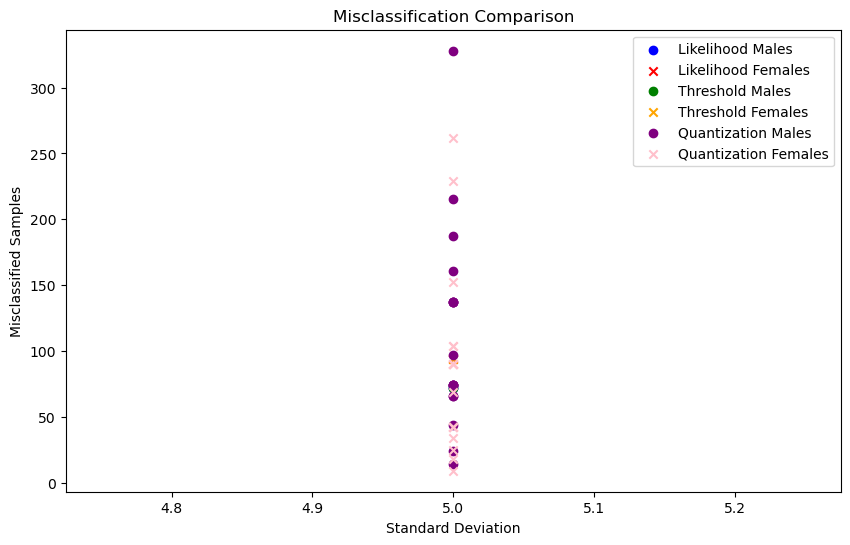

In [30]:
mean_male_height = 166
mean_female_height = 152
size = 1000

# For same interval mis-classification increases as standard deviation goes on increasing
std_deviation_values = np.arange(1, 11, 0.5)
intervals = [1]

# May lead to overfitting as we may not be able to capture noises and complex patterns as data is split into many small segments
# intervals = [0.00001]

# std_deviation_values = [5]
# intervals = np.arange(0.5, 10, 0.5)

plot_misclassification(mean_male_height, mean_female_height, std_deviation_values, intervals, size)